In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing   
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer # melakukan transformasi (fit transform = transformer)
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Utilities
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.testing import ignore_warnings

# Data
an individual annual income results from various factors. intuitively, it is influenced by the individual education level, age, gender, occupation, etc

Fields :
* The dataset contains 16 columns
* the income is divide into two classes : <=50K and >50K

Number of attributes : 14
* THese are the demographics and others features to describe a person

We will explore the possibility in predicting income level based on the individiuals personal informations,

# Preprocessing Scheme
* One Hot Encoder = Relationship, sex ,race
* Binary Encoder  = Workclass, Occupation, native.country, marital.status (missing value)
* Ordinal Encoder = education (already encoded, just drop this)
* Drop            = fnlgwt, education
* Model = Decision Tree

In [2]:
df = pd.read_csv('8. adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

ada variable yang bernilai ? tapi tidak terdeteksi sebagai missing value

In [6]:
df.replace('?',np.nan,inplace=True)

In [7]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## Data Preprocessing

karena ada missing value dari beberapa feature, maka kita harus memasukkan value sebelum dapat memproses model

In [8]:
binary_encod = Pipeline([
    ('simp',SimpleImputer(strategy='most_frequent')),
    ('binary',ce.BinaryEncoder())
])

In [9]:
transformer = ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['relationship','race','sex']),
    ('binary encod',binary_encod,['workclass','occupation','native.country','marital.status'])
],remainder='passthrough')

## Data Splitting

In [10]:
X = df.drop(['fnlwgt','education','income'],axis=1)
y = np.where(df['income']=='>50K',1,0)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                stratify = y)

## Data Transform

In [12]:
X_train_proc = transformer.fit_transform(X_train)
X_test_proc = transformer.fit_transform(X_test)

In [13]:
X_train_proc = pd.DataFrame(X_train_proc)
X_test_proc  = pd.DataFrame(X_test_proc) 

In [14]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [15]:
transformer.transformers_[1][1]['binary'].get_feature_names()

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '1_4',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '2_5',
 '2_6',
 '3_0',
 '3_1',
 '3_2',
 '3_3']

In [16]:
features = list(transformer.transformers_[0][1].get_feature_names())+transformer.transformers_[1][1]['binary'].get_feature_names()+['age','education.num','capital.gain','capital.loss','hours.per.week']

In [17]:
X_test_proc.columns = features
X_train_proc.columns = features

## Finding best depth

In [18]:
k = range(1,30,1)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train_proc,y_train)
    
    y_predict_train = tree.predict(X_train_proc)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test  = tree.predict(X_test_proc)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth=i

In [19]:
score,best_depth

(0.8535806411988699, 7)

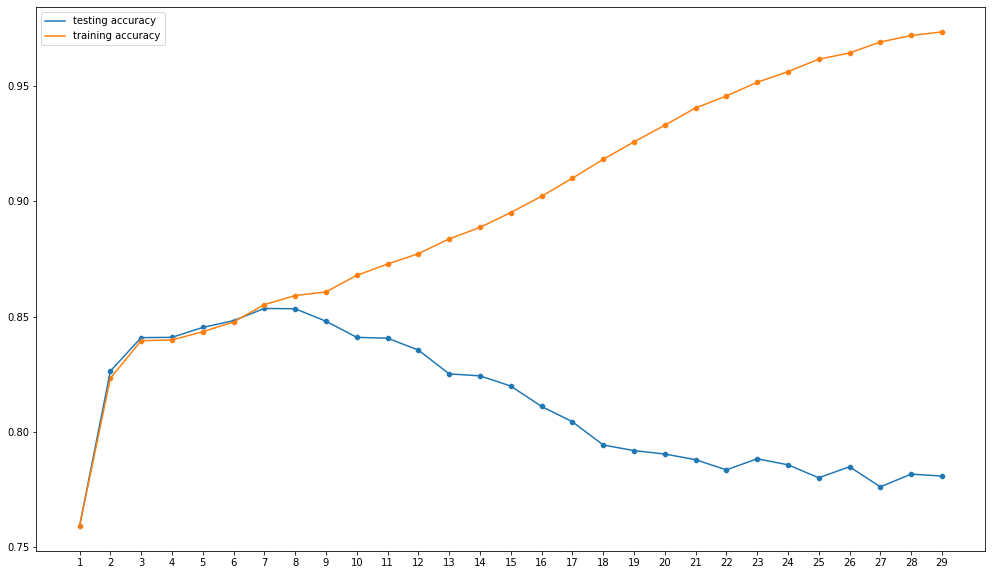

In [20]:
plt.figure(figsize = (17,10))
sns.lineplot(k,testing_accuracy)
sns.scatterplot(k,testing_accuracy)
sns.lineplot(k,training_accuracy)
sns.scatterplot(k,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))
plt.show()

In [22]:
print('Score      =',(round(score*100,2)),'%' '\nBest Depth =',best_depth)

Score      = 85.36 %
Best Depth = 7
